In [ ]:
import math
import numpy as np 
import matplotlib.pyplot as plt
import math



In [75]:
def f(m):
    g=9.81
    c=15
    t=10
    y_target=36
    return (g*m/c)*(1 - math.exp(-(c/m)*t)) - y_target


In [67]:
x=np.linspace(10,100,500)
y = [f(i) if i > 0 else np.nan for i in x]


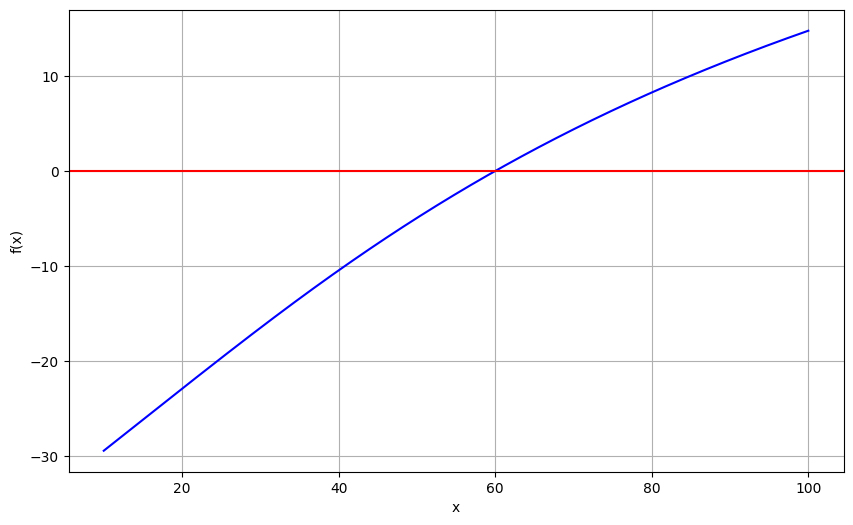

In [68]:
plt.figure(figsize=(10,6))
plt.plot(x,y,color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.axhline(y=0,color='red')
plt.grid(True)
plt.show()

In [69]:

def f_prime(m):
    g = 9.81
    c = 15
    t = 10
    exp_term = math.exp(-(c/m)*t)
    return (g/c) * (1 - exp_term - (c*t/m)*exp_term)


In [70]:
# 9.81/15) * (1 - math.exp(-(15/x)*10)) + (9.81*x/15) * (math.exp(-(15/x)*10) * (15/x**2) * 10)dfunc = "("

In [71]:
def newton_rapson_method(xi,threshold=0.001,max_iteration=100,verbose=True):
    if(f_prime(xi)==0):
        raise ValueError("Error: f' can't be zero")
    iteration = 0
    results = []
    xr_old = xi
    converged = False
    if verbose:
        print("="*80)
        print(f"{'Iter':<5} {'xi':<15} {'x_i+1':<15}  {'f(xr)':<15} {'εa (%)':<12}")
        print("="*80)
    while iteration<max_iteration:
        iteration+=1
        xr=xi-(f(xi)/f_prime(xi))
        ea=abs((xr-xr_old)/xr)*100
        results.append({
            'Iteration': iteration,
            'x_i': xi,
            'x_i+1': xr, 
            'f(x_i+1)': f(xr),
            'ea(%)': ea if ea != float('inf') else None,
            
        })
        if verbose:
            ea_str = f"{ea:.8f}" if ea != float('inf') else "N/A"
            print(f"{iteration:<5} {xi:<15.10f} {xr:<15.10f} {f(xr):<15.10f} {ea_str:<12}")
        
        
        if iteration > 1 and ea < threshold:
            converged = True
            if verbose:
                print("="*80)
                print(f"CONVERGENCE ACHIEVED!")
                print(f"Approximate relative error = {ea:.10f}% < {threshold}%")
            break
        xi=xr
        xr_old=xr
    if not converged and verbose:
        print(f"Maximum iterations ({max_iteration}) reached without convergence")
    
    return results, xr
    
        

In [72]:
print(f_prime(20))

0.6509254039863482


In [73]:
xi=40
stopping=0.001
results, final_root = newton_rapson_method(xi,stopping)

print(f"\nFINAL RESULT:")
print(f"Root: x = {final_root:.10f}")
print(f"f(x) = {f(final_root):.10f}")
print(f"Total iterations: {len(results)}")


Iter  xi              x_i+1            f(xr)           εa (%)      
1     40.0000000000   57.9970152390   -0.9258994341   31.03093351 
2     57.9970152390   59.9364866059   -0.0106306924   3.23587764  
3     59.9364866059   59.9592766219   -0.0000014529   0.03800916  
4     59.9592766219   59.9592797374   -0.0000000000   0.00000520  
CONVERGENCE ACHIEVED!
Approximate relative error = 0.0000051961% < 0.001%

FINAL RESULT:
Root: x = 59.9592797374
f(x) = -0.0000000000
Total iterations: 4


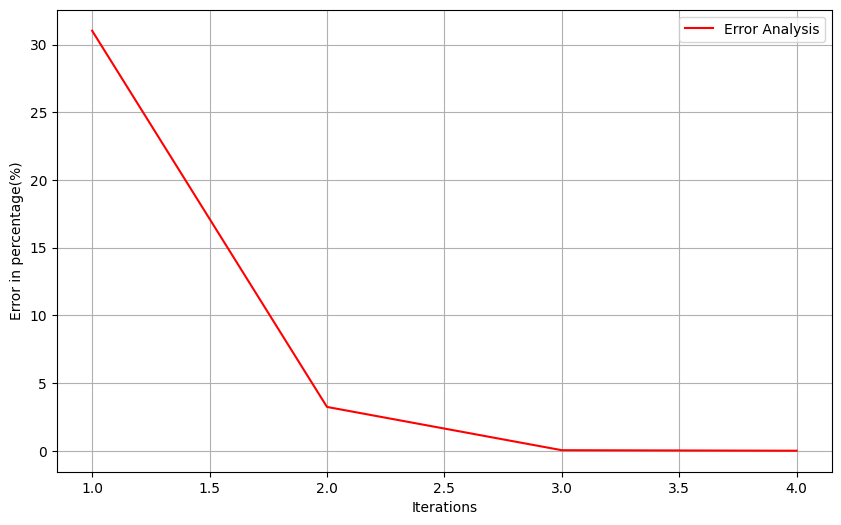

In [74]:
plt.figure(figsize=(10,6))
x=[]
y=[]
for i in range(len(results)):
    x.append(i+1)
    y.append(results[i]['ea(%)'])
    
    
plt.plot(x,y,color='red',label="Error Analysis")
plt.xlabel("Iterations")
plt.ylabel("Error in percentage(%)")
plt.legend()
plt.grid()
plt.show()